In [2]:
import ROOT

In [3]:
def nfscan(var,fname,outname):
    ROOT.gStyle.SetOptStat(0)
    ctemp = ROOT.TCanvas("ctemp","ctemp")
    hqs = []
    hgs = []
    for i in range(1,11):
        fg = ROOT.TFile("h2gg-"+fname+"nfmax{0}.root".format(i))
        fq = ROOT.TFile("h2qq-"+fname+"nfmax{0}.root".format(i))
        tg = fg.Get("EventTree")
        tq = fq.Get("EventTree")
        tq.SetLineColor(2)
        tg.Draw(var+">>hg")
        tq.Draw(var+">>hq","","same")
        hg = ctemp.GetPrimitive("hg").Clone("hg{0}".format(i))
        hq = ctemp.GetPrimitive("hq").Clone("hq{0}".format(i))
        hq.SetDirectory(0)
        hg.SetDirectory(0)
        hqs.append(hq)
        hgs.append(hg)

    c = ROOT.TCanvas("c","c",2500,1000)
    c.Divide(5,2)
    for i in range(1,11):
        c.cd(i)
        hg = hgs[i-1]
        hq = hqs[i-1]
        hg.Scale(1/hg.Integral())
        hq.Scale(1/hq.Integral())
        mx = max(hq.GetMaximum(),hg.GetMaximum())
        hg.GetYaxis().SetRangeUser(0,1.1*mx)
        hq.GetYaxis().SetRangeUser(0,1.1*mx)
        hg.Draw("hist")
        hq.Draw("histsame")
        """leg = ROOT.TLegend(0.8,0.8,0.95,0.95)
        leg.AddEntry(hq,"Quarks","l")
        leg.AddEntry(hg,"Gluons","l")
        leg.Draw("same")"""
    c.Draw()
    c.SaveAs(outname+".png")

In [5]:
nfscan("pjet_pt[0]","","q_vs_g_leading_pT_nfscan")
nfscan("pjet_pt[0]","default-split-","q_vs_g_leading_pT_default_split_nfscan")
nfscan("pjet_pt[0]","backboneGluon-","q_vs_g_leading_pT_backboneGluon_nfscan")
nfscan("pjet_pt[0]","backboneGluon-default-split-","q_vs_g_leading_pT_backboneGluon_default_split_nfscan")
nfscan("pjet_mult[0]","","q_vs_g_leading_mult_nfscan")
nfscan("pjet_mult[0]","default-split-","q_vs_g_leading_mult_default_split_nfscan")
nfscan("pjet_mult[0]","backboneGluon-","q_vs_g_leading_mult_backboneGluon_nfscan")
nfscan("pjet_mult[0]","backboneGluon-default-split-","q_vs_g_leading_mult_backboneGluon_default_split_nfscan")

Info in <TCanvas::Print>: png file q_vs_g_leading_pT_nfscan.png has been created
Info in <TCanvas::Print>: png file q_vs_g_leading_pT_default_split_nfscan.png has been created
Info in <TCanvas::Print>: png file q_vs_g_leading_pT_backboneGluon_nfscan.png has been created
Info in <TCanvas::Print>: png file q_vs_g_leading_pT_backboneGluon_default_split_nfscan.png has been created
Info in <TCanvas::Print>: png file q_vs_g_leading_mult_nfscan.png has been created
Info in <TCanvas::Print>: png file q_vs_g_leading_mult_default_split_nfscan.png has been created
Info in <TCanvas::Print>: png file q_vs_g_leading_mult_backboneGluon_nfscan.png has been created
Info in <TCanvas::Print>: png file q_vs_g_leading_mult_backboneGluon_default_split_nfscan.png has been created


In [4]:
def get_hist(var,file,norm=False):
    f = ROOT.TFile(file)
    t = f.Get("EventTree")
    ctemp = ROOT.TCanvas("ctemp","ctemp")
    t.Draw(var+">>hist")
    h = ctemp.GetPrimitive("hist").Clone()
    h.SetDirectory(0)
    if norm:
        h.Scale(1/h.Integral())
    return h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file normGen_compare_settings_leading_phi.png has been created


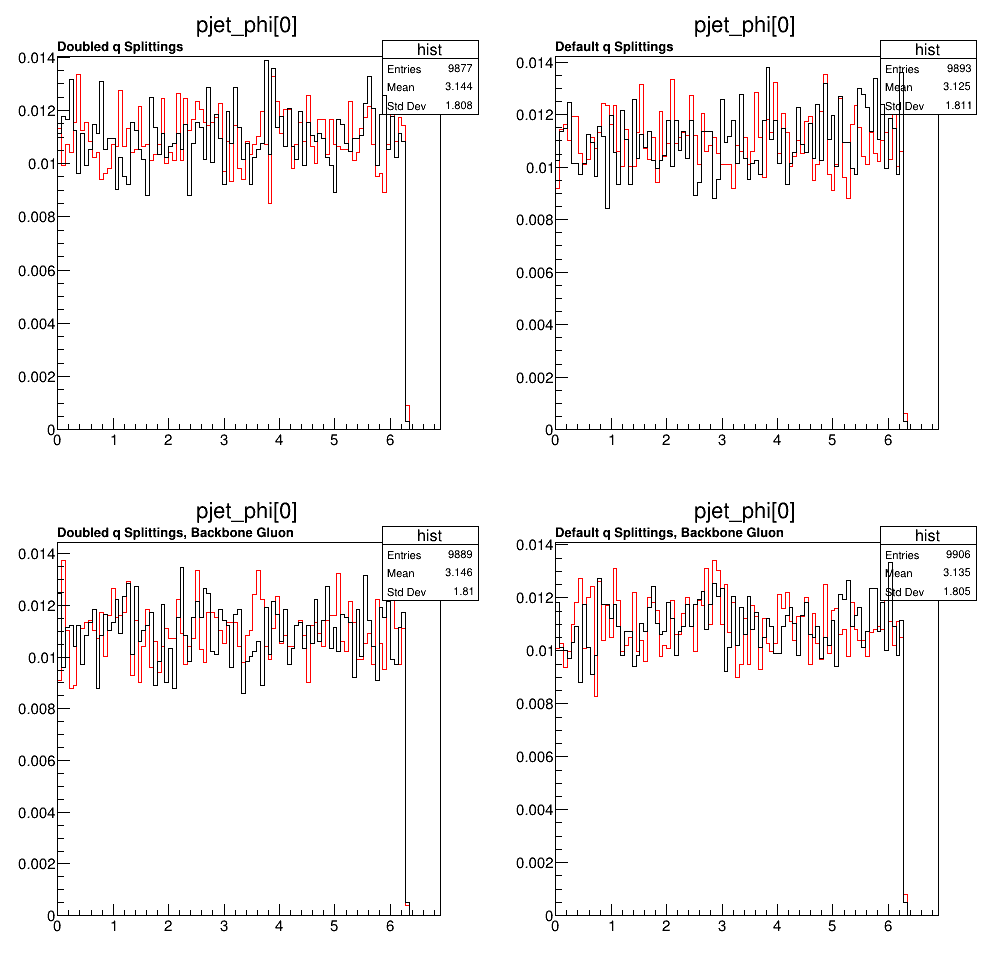

In [14]:
c = ROOT.TCanvas("c","c",1000,1000)
c.Divide(2,2)
var = "pjet_phi[0]"
prefix = "/global/homes/s/sambt/Jets/optimal-classifiers/pythia83-evtgen/src/"

hq1 = get_hist(var,prefix+"h2qq.root",True)
hq2 = get_hist(var,prefix+"h2qq-default-split.root",True)
hq3 = get_hist(var,prefix+"h2qq-backboneGluon.root",True)
hq4 = get_hist(var,prefix+"h2qq-backboneGluon-default-split.root",True)
hq1.SetLineColor(2)
hq2.SetLineColor(2)
hq3.SetLineColor(2)
hq4.SetLineColor(2)

hg1 = get_hist(var,prefix+"h2gg.root",True)
hg2 = get_hist(var,prefix+"h2gg-default-split.root",True)
hg3 = get_hist(var,prefix+"h2gg-backboneGluon.root",True)
hg4 = get_hist(var,prefix+"h2gg-backboneGluon-default-split.root",True)
hg1.SetLineColor(1)
hg2.SetLineColor(1)
hg3.SetLineColor(1)
hg4.SetLineColor(1)

c.cd(1)
hq1.Draw("hist")
hg1.Draw("histsame")
tex1 = ROOT.TText(0.1,0.91,"Doubled q Splittings")
tex1.SetNDC()
tex1.SetTextSize(0.03)
tex1.Draw("same")
c.cd(2)
hq2.Draw("hist")
hg2.Draw("histsame")
tex2 = ROOT.TText(0.1,0.91,"Default q Splittings")
tex2.SetNDC()
tex2.SetTextSize(0.03)
tex2.Draw("same")
c.cd(3)
hq3.Draw("hist")
hg3.Draw("histsame")
tex3 = ROOT.TText(0.1,0.91,"Doubled q Splittings, Backbone Gluon")
tex3.SetNDC()
tex3.SetTextSize(0.03)
tex3.Draw("same")
c.cd(4)
hq4.Draw("hist")
hg4.Draw("histsame")
tex4 = ROOT.TText(0.1,0.91,"Default q Splittings, Backbone Gluon")
tex4.SetNDC()
tex4.SetTextSize(0.03)
tex4.Draw("same")

c.Draw()
c.SaveAs("normGen_compare_settings_leading_phi.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file leading_vars_backboneGluon_10k.png has been created


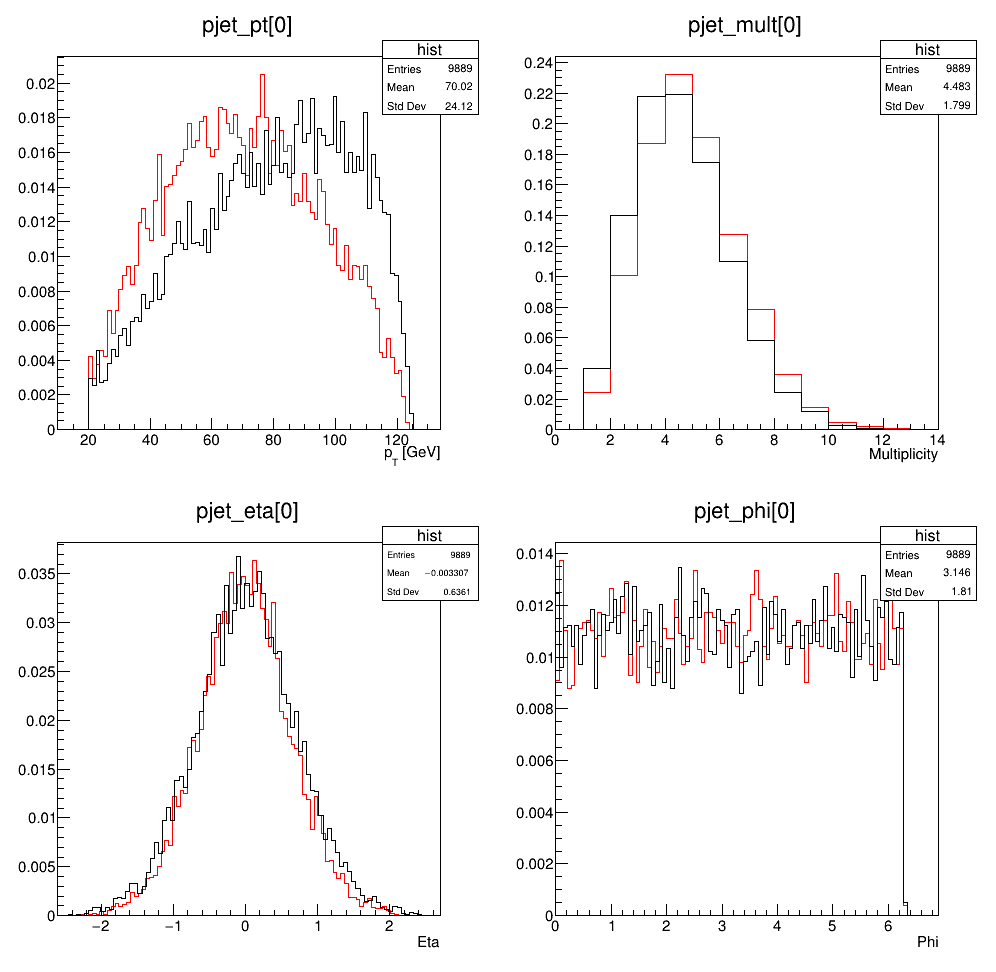

In [9]:
c = ROOT.TCanvas("c","c",1000,1000)
c.Divide(2,2)

fq = "/global/homes/s/sambt/Jets/optimal-classifiers/pythia83-evtgen/src/h2qq-backboneGluon.root"
fg = "/global/homes/s/sambt/Jets/optimal-classifiers/pythia83-evtgen/src/h2gg-backboneGluon.root"
#fq = "/global/project/projectdirs/atlas/sambt/pythia83-output/optimal-classifiers/kernel-1/H2qq-backboneGluon-default-split/total.root"
#fg = "/global/project/projectdirs/atlas/sambt/pythia83-output/optimal-classifiers/kernel-1/H2gg-backboneGluon-default-split/total.root"

hq1 = get_hist("pjet_pt[0]",fq,True)
hq1.SetXTitle("p_{T} [GeV]")
hq2 = get_hist("pjet_mult[0]",fq,True)
hq2.SetXTitle("Multiplicity")
hq3 = get_hist("pjet_eta[0]",fq,True)
hq3.SetXTitle("Eta")
hq4 = get_hist("pjet_phi[0]",fq,True)
hq4.SetXTitle("Phi")
hq1.SetLineColor(2)
hq2.SetLineColor(2)
hq3.SetLineColor(2)
hq4.SetLineColor(2)

hg1 = get_hist("pjet_pt[0]",fg,True)
hg1.SetXTitle("p_{T} [GeV]")
hg2 = get_hist("pjet_mult[0]",fg,True)
hg2.SetXTitle("Multiplicity")
hg3 = get_hist("pjet_eta[0]",fg,True)
hg3.SetXTitle("Eta")
hg4 = get_hist("pjet_phi[0]",fg,True)
hg4.SetXTitle("Phi")
hg1.SetLineColor(1)
hg2.SetLineColor(1)
hg3.SetLineColor(1)
hg4.SetLineColor(1)

c.cd(1)
hq1.Draw("hist")
hg1.Draw("histsame")
c.cd(2)
hq2.Draw("hist")
hg2.Draw("histsame")
c.cd(3)
hq3.Draw("hist")
hg3.Draw("histsame")
c.cd(4)
hq4.Draw("hist")
hg4.Draw("histsame")

c.Draw()
c.SaveAs("leading_vars_backboneGluon_10k.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


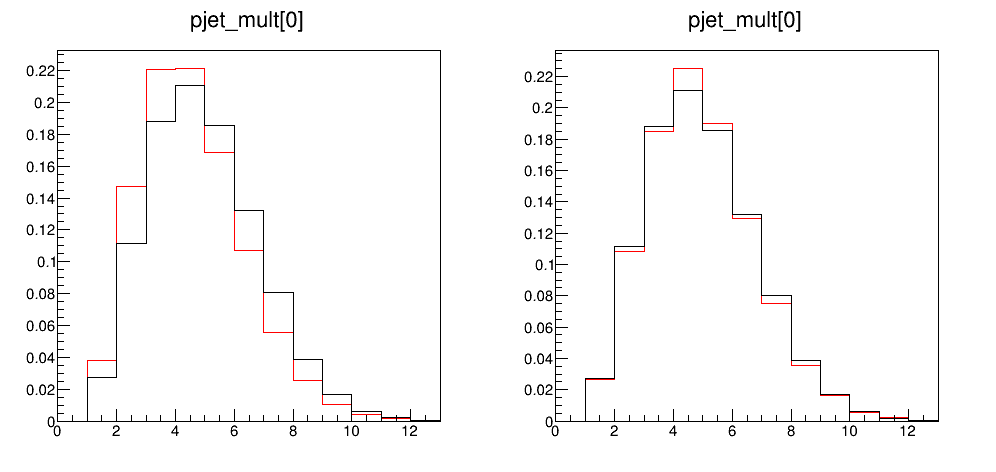

In [7]:
fq1 = ROOT.TFile("h2qq-default-split.root")
fg1 = ROOT.TFile("h2gg-default-split.root")
fq2 = ROOT.TFile("h2qq.root")
fg2 = ROOT.TFile("h2gg.root")
tq1 = fq1.Get("EventTree")
tg1 = fg1.Get("EventTree")
tq2 = fq2.Get("EventTree")
tg2 = fg2.Get("EventTree")
tg1.SetLineColor(1)
tq1.SetLineColor(2)
tg2.SetLineColor(1)
tq2.SetLineColor(2)

ctemp = ROOT.TCanvas("ctemp","ctemp")
tq1.Draw("pjet_mult[0]>>hq1")
tg1.Draw("pjet_mult[0]>>hg1","","same")
hq1 = ctemp.GetPrimitive("hq1")
hg1 = ctemp.GetPrimitive("hg1")
hq1.SetDirectory(0)
hg1.SetDirectory(0)
hq1.Scale(1/hq1.Integral())
hg1.Scale(1/hg1.Integral())
tq2.Draw("pjet_mult[0]>>hq2")
tg2.Draw("pjet_mult[0]>>hg2","","same")
hq2 = ctemp.GetPrimitive("hq2")
hg2 = ctemp.GetPrimitive("hg2")
hq2.SetDirectory(0)
hg2.SetDirectory(0)
hq2.Scale(1/hq2.Integral())
hg2.Scale(1/hg2.Integral())
ctemp.Close()

c = ROOT.TCanvas("c","c",1000,500)
c.Divide(2,1)
c.cd(1)
hq1.Draw("hist")
hg1.Draw("histsame")
c.cd(2)
hq2.Draw("hist")
hg2.Draw("histsame")
c.Draw()